In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data= pd.read_csv('train (2).csv')

In [7]:
train_data.head(40)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


<AxesSubplot:xlabel='target', ylabel='count'>

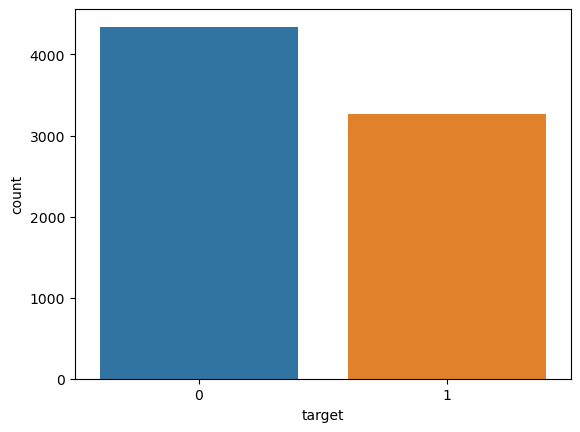

In [8]:
sns.countplot(data=train_data,x='target')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data = train_data[['text','target']]

In [15]:
X=data['text']

In [16]:
y=data['target']

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tf = TfidfVectorizer(stop_words='english')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
X_train_tfidf = tf.fit_transform(X_train)

In [21]:
X_test_tfidf = tf.transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
nb = MultinomialNB()

In [24]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [27]:
preds = nb.predict(X_test_tfidf)

In [28]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       442
           1       0.82      0.64      0.72       320

    accuracy                           0.79       762
   macro avg       0.80      0.77      0.78       762
weighted avg       0.79      0.79      0.78       762



In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression(max_iter=1000)

In [31]:
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [32]:
preds = log_model.predict(X_test_tfidf)

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       442
           1       0.81      0.69      0.75       320

    accuracy                           0.80       762
   macro avg       0.80      0.79      0.79       762
weighted avg       0.80      0.80      0.80       762



In [35]:
from sklearn.svm import SVC,LinearSVC

In [36]:
svc = SVC()

In [37]:
svc.fit(X_train_tfidf,y_train)

SVC()

In [38]:
preds = svc.predict(X_test_tfidf)

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       442
           1       0.83      0.66      0.74       320

    accuracy                           0.80       762
   macro avg       0.81      0.78      0.79       762
weighted avg       0.80      0.80      0.80       762



In [40]:
linear_svc = LinearSVC()

In [41]:
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [42]:
preds = linear_svc.predict(X_test_tfidf)

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       442
           1       0.77      0.71      0.74       320

    accuracy                           0.79       762
   macro avg       0.79      0.78      0.78       762
weighted avg       0.79      0.79      0.79       762



In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid={'C':[0.01,0.2,0.5,1],'penalty':['l1','l2']}

In [60]:
grid = GridSearchCV(linear_svc,param_grid)

In [61]:
grid.fit(X_train_tfidf,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_cl

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.2, 0.5, 1], 'penalty': ['l1', 'l2']})

In [53]:
# linear_svc.get_params().keys()

In [62]:
grid.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [55]:
preds = grid.predict(X_test_tfidf)

In [56]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       442
           1       0.79      0.69      0.74       320

    accuracy                           0.80       762
   macro avg       0.79      0.78      0.79       762
weighted avg       0.80      0.80      0.79       762



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


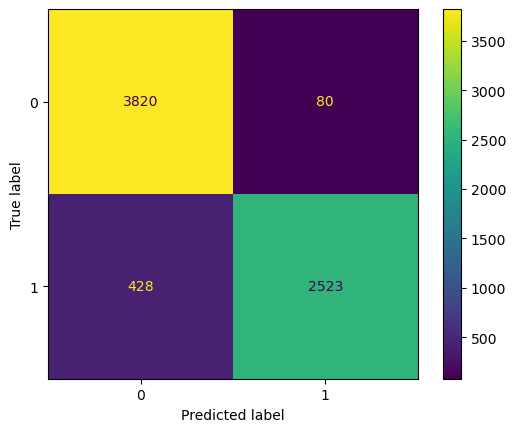

In [57]:
plot_confusion_matrix(grid,X_train_tfidf,y_train)

In [63]:
final_X_tfidf = tf.fit_transform(X)

In [76]:
X_test = pd.read_csv('test (2).csv')

In [77]:
X_test_text = X_test['text']

In [78]:
X_test_text_tfidf = tf.transform(X_test_text)

In [79]:
linear_svc = LinearSVC(C=0.2,penalty='l2')

In [80]:
linear_svc.fit(final_X_tfidf,y)

LinearSVC(C=0.2)

In [81]:
preds = linear_svc.predict(X_test_text_tfidf)

In [82]:
output = pd.DataFrame({'id':X_test.id,'target':preds})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
